In [1]:
#Step 1: Import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 2: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Step 3: Preprocessing
x_train = x_train.astype('float32') / 255.0  # Normalize
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)        # One-hot encode
y_test = to_categorical(y_test, 10)

In [4]:
# Step 4: Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten 28x28 to 784
    Dense(128, activation='relu'),          # Hidden layer
    Dense(64, activation='relu'),           # Another hidden layer
    Dense(10, activation='softmax')         # Output layer
])

In [5]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Step 6: Train the model
history=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9251 - val_loss: 0.1304 - val_accuracy: 0.9603
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1095 - accuracy: 0.9656 - val_loss: 0.1013 - val_accuracy: 0.9700
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9769 - val_loss: 0.0900 - val_accuracy: 0.9725
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9808 - val_loss: 0.0907 - val_accuracy: 0.9755
Epoch 5/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0874 - val_accuracy: 0.9750


In [7]:
# Step 7: Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9737
Test Accuracy: 97.37%


In [8]:
# Step 8: Make predictions
predictions = model.predict(x_test[:5])
print("Predicted labels:", predictions.argmax(axis=1))
print("True labels:", y_test[:5].argmax(axis=1))

1/1 [==============================] - 0s 69ms/step
Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]


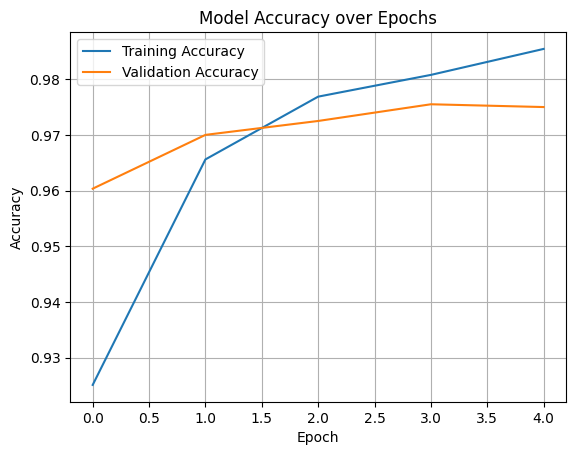

In [9]:
# Step 9: Display training accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()